In [2]:
import pandas as pd
from pandas import read_csv
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import cm
import folium
import numpy as np
import os
import re

chicago_CW = pd.read_csv('Crimes_-_2001_to_present.csv',parse_dates=['Date'])

print(type(chicago_CW))

<class 'pandas.core.frame.DataFrame'>


In [3]:
CW_new = chicago_CW
CW_new.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,11694147,JC271632,2019-05-20 23:59:00,078XX S LAFLIN ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,-87.661858,"(41.751652164, -87.661857961)",17.0,21554.0,70.0,557.0,31.0,59.0,20.0,230.0
1,11694159,JC271636,2019-05-20 23:55:00,067XX S EBERHART AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,RESIDENCE,False,False,...,-87.613014,"(41.772330991, -87.613013719)",53.0,22260.0,9.0,348.0,4.0,60.0,18.0,206.0
2,11694212,JC271609,2019-05-20 23:55:00,014XX N SEDGWICK ST,0460,BATTERY,SIMPLE,APARTMENT,False,False,...,-87.638510,"(41.908430535, -87.638509526)",41.0,14926.0,37.0,309.0,46.0,54.0,14.0,198.0
3,11694165,JC271643,2019-05-20 23:53:00,019XX E 71ST ST,3731,INTERFERENCE WITH PUBLIC OFFICER,OBSTRUCTING IDENTIFICATION,RESIDENCE,True,False,...,-87.578556,"(41.766223272, -87.578555923)",32.0,22538.0,39.0,381.0,33.0,24.0,18.0,212.0
4,11694124,JC271646,2019-05-20 23:50:00,020XX E 76TH ST,5111,OTHER OFFENSE,GUN OFFENDER: ANNUAL REGISTRATION,STREET,True,False,...,-87.575753,"(41.757063578, -87.575753203)",9.0,22538.0,39.0,420.0,35.0,24.0,19.0,222.0


In [4]:
CW_new = CW_new.drop(['Case Number','Historical Wards 2003-2015','Census Tracts',
                             'Boundaries - ZIP Codes','Police Districts','Police Beats',
                             'X Coordinate','Y Coordinate','Updated On','Community Areas','Wards'], axis=1)
CW_new.head()

,ID,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Location,Zip Codes
0,11694147,2019-05-20 23:59:00,078XX S LAFLIN ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,612,6.0,17.0,71.0,08B,2019,41.751652,-87.661858,"(41.751652164, -87.661857961)",21554.0
1,11694159,2019-05-20 23:55:00,067XX S EBERHART AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,RESIDENCE,False,False,321,3.0,20.0,42.0,15,2019,41.772331,-87.613014,"(41.772330991, -87.613013719)",22260.0
2,11694212,2019-05-20 23:55:00,014XX N SEDGWICK ST,0460,BATTERY,SIMPLE,APARTMENT,False,False,1821,18.0,27.0,8.0,08B,2019,41.908431,-87.638510,"(41.908430535, -87.638509526)",14926.0
3,11694165,2019-05-20 23:53:00,019XX E 71ST ST,3731,INTERFERENCE WITH PUBLIC OFFICER,OBSTRUCTING IDENTIFICATION,RESIDENCE,True,False,332,3.0,5.0,43.0,24,2019,41.766223,-87.578556,"(41.766223272, -87.578555923)",22538.0
4,11694124,2019-05-20 23:50:00,020XX E 76TH ST,5111,OTHER OFFENSE,GUN OFFENDER: ANNUAL REGISTRATION,STREET,True,False,414,4.0,8.0,43.0,26,2019,41.757064,-87.575753,"(41.757063578, -87.575753203)",22538.0


In [5]:
CW_new.isna().any()

ID                      False
Date                    False
Block                   False
IUCR                    False
Primary Type            False
Description             False
Location Description     True
Arrest                  False
Domestic                False
Beat                    False
District                 True
Ward                     True
Community Area           True
FBI Code                False
Year                    False
Latitude                 True
Longitude                True
Location                 True
Zip Codes                True
dtype: bool

In [6]:
CW_new.shape

(6877122, 19)

In [7]:
CW_new.dtypes

ID                               int64
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                       float64
Ward                           float64
Community Area                 float64
FBI Code                        object
Year                             int64
Latitude                       float64
Longitude                      float64
Location                        object
Zip Codes                      float64
dtype: object

In [8]:
CW_new['District'].describe()
CW_new['Primary Type'].describe()

count     6877122
unique         35
top         THEFT
freq      1448414
Name: Primary Type, dtype: object

In [9]:
#in this case, there is no point in replacing the NA's with mean values or with the most happening value in the dataset since it will only skew the results or predictions.
#Hence, we are removing all the rows with NA's in this dataset.

CW_clean = CW_new.dropna()


In [10]:
CW_clean.head()

,ID,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Location,Zip Codes
0,11694147,2019-05-20 23:59:00,078XX S LAFLIN ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,612,6.0,17.0,71.0,08B,2019,41.751652,-87.661858,"(41.751652164, -87.661857961)",21554.0
1,11694159,2019-05-20 23:55:00,067XX S EBERHART AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,RESIDENCE,False,False,321,3.0,20.0,42.0,15,2019,41.772331,-87.613014,"(41.772330991, -87.613013719)",22260.0
2,11694212,2019-05-20 23:55:00,014XX N SEDGWICK ST,0460,BATTERY,SIMPLE,APARTMENT,False,False,1821,18.0,27.0,8.0,08B,2019,41.908431,-87.638510,"(41.908430535, -87.638509526)",14926.0
3,11694165,2019-05-20 23:53:00,019XX E 71ST ST,3731,INTERFERENCE WITH PUBLIC OFFICER,OBSTRUCTING IDENTIFICATION,RESIDENCE,True,False,332,3.0,5.0,43.0,24,2019,41.766223,-87.578556,"(41.766223272, -87.578555923)",22538.0
4,11694124,2019-05-20 23:50:00,020XX E 76TH ST,5111,OTHER OFFENSE,GUN OFFENDER: ANNUAL REGISTRATION,STREET,True,False,414,4.0,8.0,43.0,26,2019,41.757064,-87.575753,"(41.757063578, -87.575753203)",22538.0


In [11]:
CW_clean.dtypes

ID                               int64
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                       float64
Ward                           float64
Community Area                 float64
FBI Code                        object
Year                             int64
Latitude                       float64
Longitude                      float64
Location                        object
Zip Codes                      float64
dtype: object

In [12]:
CW_clean.shape

(6201773, 19)

In [13]:
# we convert those 3 columns into 'Categorical' types 
CW_clean = CW_clean.astype({"District":int,"Ward":int, "Community Area":int,
                             "Zip Codes":int})
CW_clean.Date = pd.to_datetime(CW_clean.Date)
CW_clean.index = pd.DatetimeIndex(CW_clean.Date)
CW_clean.head()


,ID,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Location,Zip Codes
Date,,,,,,,,,,,,,,,,,,,
2019-05-20 23:59:00,11694147,2019-05-20 23:59:00,078XX S LAFLIN ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,612,6,17,71,08B,2019,41.751652,-87.661858,"(41.751652164, -87.661857961)",21554
2019-05-20 23:55:00,11694159,2019-05-20 23:55:00,067XX S EBERHART AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,RESIDENCE,False,False,321,3,20,42,15,2019,41.772331,-87.613014,"(41.772330991, -87.613013719)",22260
2019-05-20 23:55:00,11694212,2019-05-20 23:55:00,014XX N SEDGWICK ST,0460,BATTERY,SIMPLE,APARTMENT,False,False,1821,18,27,8,08B,2019,41.908431,-87.638510,"(41.908430535, -87.638509526)",14926
2019-05-20 23:53:00,11694165,2019-05-20 23:53:00,019XX E 71ST ST,3731,INTERFERENCE WITH PUBLIC OFFICER,OBSTRUCTING IDENTIFICATION,RESIDENCE,True,False,332,3,5,43,24,2019,41.766223,-87.578556,"(41.766223272, -87.578555923)",22538
2019-05-20 23:50:00,11694124,2019-05-20 23:50:00,020XX E 76TH ST,5111,OTHER OFFENSE,GUN OFFENDER: ANNUAL REGISTRATION,STREET,True,False,414,4,8,43,26,2019,41.757064,-87.575753,"(41.757063578, -87.575753203)",22538


In [14]:
CW_clean['Hour'] = CW_clean.Date.dt.hour
CW_clean['Month'] = CW_clean.Date.dt.month

EDA:

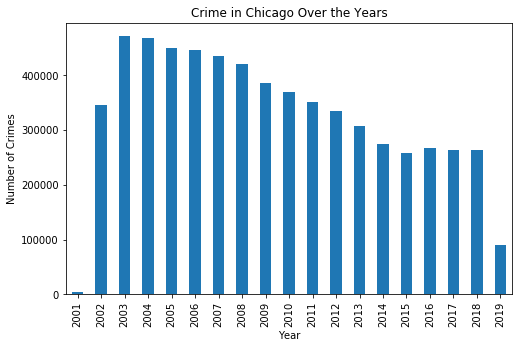

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

In [15]:
plt.figure(figsize = (8,5))
CW_clean.groupby([CW_clean.index.year]).size().plot.bar()
plt.title('Crime in Chicago Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()
plt.figure(figsize = (8,5))

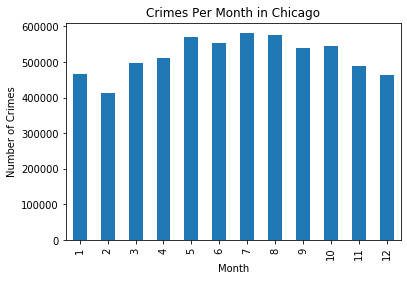

In [16]:
CW_clean.groupby([CW_clean.index.month]).size().plot.bar()
plt.title('Crimes Per Month in Chicago')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.show()

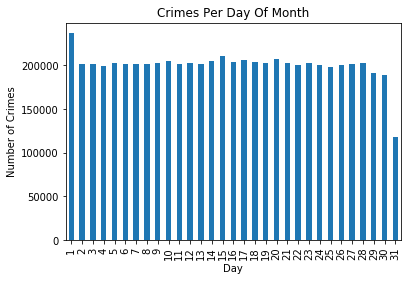

In [17]:
CW_clean.groupby([CW_clean.index.day]).size().plot.bar()
plt.title('Crimes Per Day Of Month')
plt.xlabel('Day')
plt.ylabel('Number of Crimes')
plt.show()

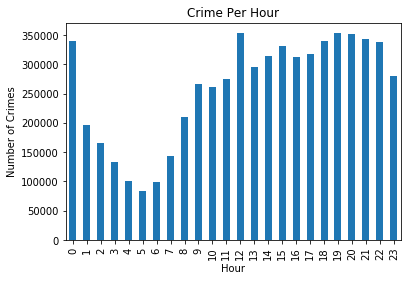

In [18]:
CW_clean.groupby([CW_clean.index.hour]).size().plot.bar()
plt.title('Crime Per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Crimes')
plt.show()

In [19]:
#top 10 values of Location Description
pd.value_counts(CW_clean['Location Description'])[:10]

STREET                            1598182
RESIDENCE                         1029834
APARTMENT                          672761
SIDEWALK                           633268
OTHER                              231179
PARKING LOT/GARAGE(NON.RESID.)     176198
ALLEY                              138975
SCHOOL, PUBLIC, BUILDING           129361
RESIDENCE-GARAGE                   119662
SMALL RETAIL STORE                 112442
Name: Location Description, dtype: int64

In [20]:
#top 10 values of Description
pd.value_counts(CW_clean['Description'])[:10]

SIMPLE                          681591
DOMESTIC BATTERY SIMPLE         527374
$500 AND UNDER                  477065
TO VEHICLE                      343444
TO PROPERTY                     324132
OVER $500                       311340
POSS: CANNABIS 30GMS OR LESS    256075
FORCIBLE ENTRY                  241946
FROM BUILDING                   230383
AUTOMOBILE                      223646
Name: Description, dtype: int64

In [21]:
#top 10 values by primary type crime
pd.value_counts(CW_clean['Primary Type'])[:10]

THEFT                  1310524
BATTERY                1133645
CRIMINAL DAMAGE         709779
NARCOTICS               642546
ASSAULT                 387326
OTHER OFFENSE           385170
BURGLARY                359074
MOTOR VEHICLE THEFT     283440
DECEPTIVE PRACTICE      241754
ROBBERY                 235300
Name: Primary Type, dtype: int64

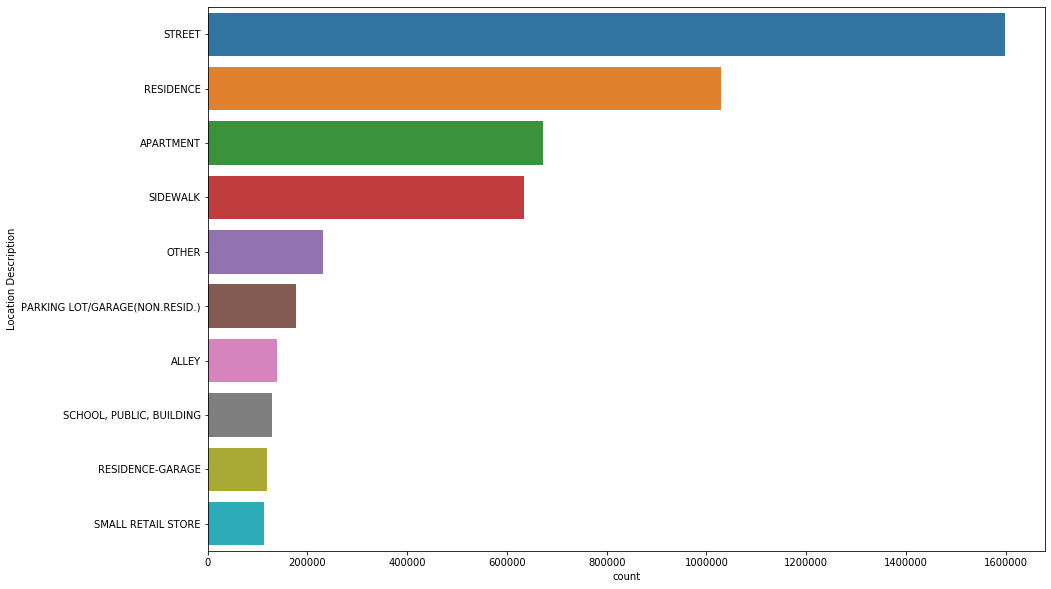

In [22]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Location Description', data = CW_clean, 
              order = CW_clean['Location Description'].value_counts().iloc[:10].index)

In [23]:
chicago_map = folium.Map(location=[41.895140898, -87.624255632],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")
PrimaryCrime = CW_clean.groupby('Primary Type').first()
PrimaryCrime_locations = PrimaryCrime.loc[:, ['Latitude', 'Longitude', 'Location Description', 'Arrest']]
PrimaryCrime_locations.head(40)

,Latitude,Longitude,Location Description,Arrest
Primary Type,,,,
ARSON,41.941156,-87.643113,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False
ASSAULT,41.773054,-87.644614,RESIDENCE PORCH/HALLWAY,False
BATTERY,41.751652,-87.661858,APARTMENT,False
BURGLARY,41.861622,-87.728704,APARTMENT,False
CONCEALED CARRY LICENSE VIOLATION,41.979006,-87.906463,AIRPORT TERMINAL UPPER LEVEL - SECURE AREA,True
CRIM SEXUAL ASSAULT,41.870817,-87.696017,STREET,False
CRIMINAL DAMAGE,41.895550,-87.706860,STREET,False
CRIMINAL TRESPASS,41.802751,-87.681823,STREET,True
DECEPTIVE PRACTICE,41.947226,-87.655545,SPORTS ARENA/STADIUM,False


In [24]:
for i in range(len(PrimaryCrime_locations)):
    lat = PrimaryCrime_locations.iloc[i][0]
    long = PrimaryCrime_locations.iloc[i][1]
    popup_text = """Primary Type:{}<br>
                Arrest:{}<br>
                Location Description:{}<br>"""
    popup_text = popup_text.format(PrimaryCrime_locations.index[i],
                               PrimaryCrime_locations.iloc[i][-1],
                               PrimaryCrime_locations.iloc[i][-2]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text, fill = True).add_to(chicago_map)
chicago_map

In [25]:
unique_locations = CW_clean['Location'].value_counts()
unique_locations.index

Index(['(41.976290414, -87.905227221)', '(41.754592961, -87.741528537)',
       '(41.883500187, -87.627876698)', '(41.897895128, -87.624096605)',
       '(41.896888586, -87.628203192)', '(41.909664252, -87.742728815)',
       '(41.885487535, -87.726422045)', '(41.904192368, -87.647000785)',
       '(41.788987036, -87.74147999)', '(41.88233367, -87.627841791)',
       ...
       '(41.742763044, -87.557252001)', '(41.718432093, -87.657617975)',
       '(41.798273369, -87.745689102)', '(41.817643766, -87.604618853)',
       '(41.989800246, -87.706389128)', '(41.980259637, -87.797034984)',
       '(41.73673456, -87.598693715)', '(41.87302808, -87.731529756)',
       '(41.935014673, -87.691945693)', '(41.818439619, -87.694518993)'],
      dtype='object', length=645643)

In [26]:
CR_index = pd.DataFrame({"Raw_String" : unique_locations.index, "ValueCount":unique_locations})
CR_index.index = range(len(unique_locations))
CR_index.head()

,Raw_String,ValueCount
0,"(41.976290414, -87.905227221)",12771
1,"(41.754592961, -87.741528537)",9250
2,"(41.883500187, -87.627876698)",7112
3,"(41.897895128, -87.624096605)",4356
4,"(41.896888586, -87.628203192)",3138


In [27]:
def Location_extractor(Raw_Str):
    preProcess = Raw_Str[1:-1].split(',')
    lat =  float(preProcess[0])
    long = float(preProcess[1])
    return (lat, long)
CR_index['LocationCoord'] = CR_index['Raw_String'].apply(Location_extractor)
CR_index  = CR_index.drop(columns=['Raw_String'], axis = 1)

In [28]:
%%time

chicago_map_crime = folium.Map(location=[41.895140898, -87.624255632],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")

for i in range(500):
    lat = CR_index['LocationCoord'].iloc[i][0]
    long = CR_index['LocationCoord'].iloc[i][1]
    radius = CR_index['ValueCount'].iloc[i] / 45
    
    if CR_index['ValueCount'].iloc[i] > 3000:
        color = "#FF4500"
    else:
        color = "#008080"
    
    popup_text = """Latitude : {}<br>
                Longitude : {}<br>
                Criminal Incidents : {}<br>"""
    popup_text = popup_text.format(lat,
                               long,
                               CR_index['ValueCount'].iloc[i]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text,
                        radius = radius, color = color, fill = True).add_to(chicago_map_crime)


Wall time: 99 ms


In [29]:
chicago_map_crime

In [30]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()

#ts = pd.Series(df['Value'].values, index=df['Date'])
CW_clean['PrimaryType Code'] = pd.Series(lb_make.fit_transform(CW_clean['Primary Type']),index=CW_clean['Date'] )
CW_clean["Description Code"] = lb_make.fit_transform(CW_clean["Description"])
CW_clean["LocationDescription Code"] = lb_make.fit_transform(CW_clean["Location Description"])
CW_clean["Arrest Code"] = lb_make.fit_transform(CW_clean["Arrest"])
CW_clean["Domestic Code"] = lb_make.fit_transform(CW_clean["Domestic"])

CW_clean[["Primary Type", "PrimaryType Code"]].tail(11)


,Primary Type,PrimaryType Code
Date,,
2001-01-01,DECEPTIVE PRACTICE,8
2001-01-01,THEFT,32
2001-01-01,THEFT,32
2001-01-01,THEFT,32
2001-01-01,THEFT,32
2001-01-01,THEFT,32
2001-01-01,THEFT,32
2001-01-01,THEFT,32
2001-01-01,THEFT,32


In [31]:

#rename some columns
CW_clean = CW_clean.rename(columns={'Primary Type':'PrimaryType',
                                   'Location Description': 'LocDesc', 'Community Area': 'CommArea', 'FBI Code': 'FBIcode',
                                   'Zip Codes': 'ZipCodes','Description Code':'DescCode','LocationDescription Code':'LocDescCode',
                                   'Arrest Code':'ArrestCode','Domestic Code':'DomCode','PrimaryType Code': 'PrimaryTypeCode',
                                   })

In [32]:
CW_clean.dtypes

ID                          int64
Date               datetime64[ns]
Block                      object
IUCR                       object
PrimaryType                object
Description                object
LocDesc                    object
Arrest                       bool
Domestic                     bool
Beat                        int64
District                    int32
Ward                        int32
CommArea                    int32
FBIcode                    object
Year                        int64
Latitude                  float64
Longitude                 float64
Location                   object
ZipCodes                    int32
Hour                        int64
Month                       int64
PrimaryTypeCode             int32
DescCode                    int32
LocDescCode                 int32
ArrestCode                  int64
DomCode                     int64
dtype: object

In [33]:
CW_clean.corr()

,ID,Arrest,Domestic,Beat,District,Ward,CommArea,Year,Latitude,Longitude,ZipCodes,Hour,Month,PrimaryTypeCode,DescCode,LocDescCode,ArrestCode,DomCode
ID,1.000000,-0.059101,0.049159,-0.033869,-0.003954,0.019204,-0.007923,0.986984,0.002280,0.001480,-0.004069,-0.003708,-0.013061,0.017071,-0.037164,-0.042923,-0.059101,0.049159
Arrest,-0.059101,1.000000,-0.067551,-0.018019,-0.017658,-0.017076,-0.004362,-0.060049,-0.000787,-0.032852,0.003344,0.082258,-0.018671,0.011023,0.184528,0.025527,1.000000,-0.067551
Domestic,0.049159,-0.067551,1.000000,-0.043523,-0.040511,-0.052545,0.075497,0.050780,-0.079152,0.005964,0.033567,-0.031616,-0.011647,-0.244549,-0.108363,-0.162213,-0.067551,1.000000
Beat,-0.033869,-0.018019,-0.043523,1.000000,0.944551,0.640658,-0.503130,-0.036054,0.618759,-0.484523,-0.107118,-0.008580,0.004540,0.042348,-0.001335,0.018023,-0.018019,-0.043523
District,-0.003954,-0.017658,-0.040511,0.944551,1.000000,0.689562,-0.496592,-0.005336,0.626428,-0.535763,-0.094853,-0.008373,0.003739,0.038054,-0.000905,0.023204,-0.017658,-0.040511
Ward,0.019204,-0.017076,-0.052545,0.640658,0.689562,1.000000,-0.531440,0.018754,0.632543,-0.439079,-0.126100,-0.004986,0.003414,0.063193,0.003070,0.000975,-0.017076,-0.052545
CommArea,-0.007923,-0.004362,0.075497,-0.503130,-0.496592,-0.531440,1.000000,-0.008543,-0.754360,0.245451,0.096285,0.003450,-0.004365,-0.075771,0.000986,0.016909,-0.004362,0.075497
Year,0.986984,-0.060049,0.050780,-0.036054,-0.005336,0.018754,-0.008543,1.000000,0.002399,0.002689,-0.004569,-0.003008,-0.072093,0.013721,-0.039235,-0.044176,-0.060049,0.050780
Latitude,0.002280,-0.000787,-0.079152,0.618759,0.626428,0.632543,-0.754360,0.002399,1.000000,-0.447935,-0.158902,-0.005320,0.004197,0.079053,-0.001731,-0.037151,-0.000787,-0.079152
Longitude,0.001480,-0.032852,0.005964,-0.484523,-0.535763,-0.439079,0.245451,0.002689,-0.447935,1.000000,0.051025,-0.001885,0.001048,-0.003380,-0.002883,-0.023712,-0.032852,0.005964


In [34]:
# Load the Crime WEather dataset
X = CW_clean[['Beat','CommArea','Year',
              'Latitude','Longitude','ZipCodes','DescCode','LocDescCode',
             'DomCode','ArrestCode','Hour','Month']]

Y = CW_clean[['PrimaryTypeCode']]
#y = CW_clean.PrimaryType # define the target variable (dependent variable) as y

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)


In [36]:
X_train.dtypes
X_train.duplicated().sum()

40481

In [37]:
Y_train.head()

,PrimaryTypeCode
Date,
2002-11-28 18:30:00,17
2007-10-26 20:00:00,2
2012-06-07 01:54:00,1
2015-03-25 15:00:00,2
2014-01-30 00:01:00,8


In [38]:
type(X_train), type(Y_train)


(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

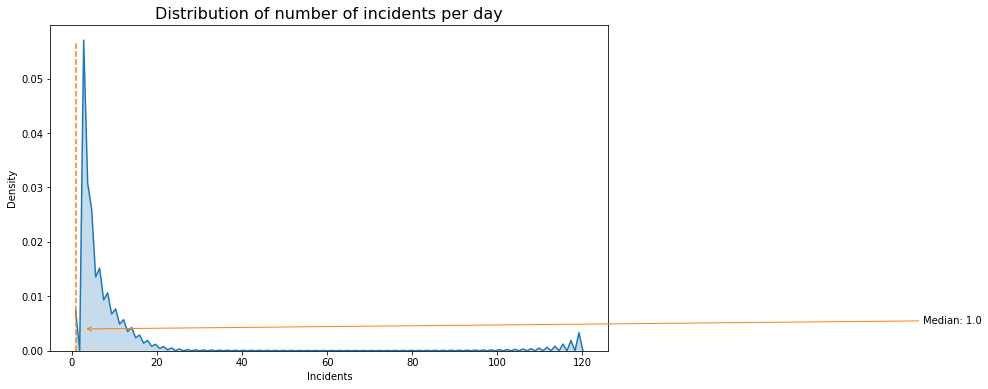

In [39]:
col = sns.color_palette()

plt.figure(figsize=(10, 6))
data = X_train.groupby('Date').count().iloc[:, 0]
sns.kdeplot(data=data, shade=True)
plt.axvline(x=data.median(), ymax=0.95, linestyle='--', color=col[1])
plt.annotate(
    'Median: ' + str(data.median()),
    xy=(data.median(), 0.004),
    xytext=(200, 0.005),
    arrowprops=dict(arrowstyle='->', color=col[1], shrinkB=10))
plt.title(
    'Distribution of number of incidents per day', fontdict={'fontsize': 16})
plt.xlabel('Incidents')
plt.ylabel('Density')
plt.legend().remove()
plt.show()

In [51]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
train_xgb = xgb.DMatrix(X_train, label=Y_train)
test_xgb  = xgb.DMatrix(X_test)

In [52]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [53]:
# Instantiate the XGBRegressor: xg_rgr
xg_rgr = xgb.XGBRegressor(objective='reg:linear', n_estimators=10, seed=123)
# Fit the regressor to the training set
xg_rgr.fit(X_train,Y_train.values.ravel())
# Predict the labels of the test set: preds
preds = xg_rgr.predict(X_test)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 9.948707


Visualize Boosting Trees and Feature Importance

You can also visualize individual trees from the fully boosted model that XGBoost creates using the entire dataset. XGBoost has a plot_tree() function that makes this type of visualization easy. Once you train a model using the XGBoost learning API, you can pass it to the plot_tree() function along with the number of trees you want to plot using the num_trees argument.

[11:20:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[11:20:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[11:20:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[11:20:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[11:20:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[11:20:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[11:20:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[11:20:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[11:20:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[

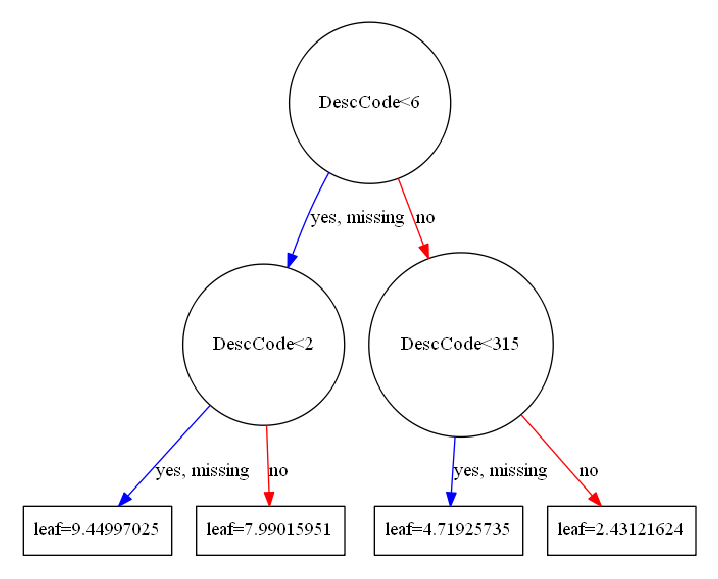

In [54]:
# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":2}
# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=train_xgb, num_boost_round=10)
# Plot the first tree
fig = plt.figure(dpi=180)
ax = plt.subplot(1,1,1)
xgb.plot_tree(xg_reg,num_trees=0,ax=ax)
plt.show()

<Figure size 1080x720 with 0 Axes>

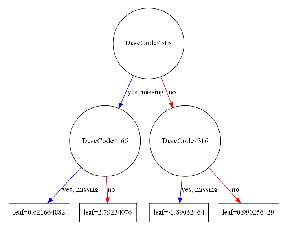

In [55]:
fig = plt.figure(dpi=180)
# Plot the fifth tree
xgb.plot_tree(xg_reg,num_trees=4)
#plt.savefig("fifthtree_structure.pdf")
plt.show()


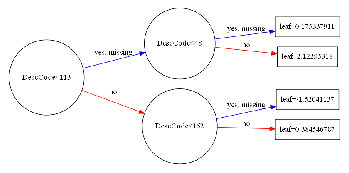

In [56]:
# Plot the last tree sideways
xgb.plot_tree(xg_reg,num_trees=9, rankdir='LR')
#plt.savefig("lasttree_structure.pdf")
plt.show()

In [57]:
#tuning parameters
params = {
    'max_depth': 5,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'reg:linear',  # error evaluation for multiclass training
    'colsample_bytree': 0.3, # percentage of samples used per tree
    'learning_rate': 0.1,
    'alpha': 10
}

In [58]:
cv_results = xgb.cv(dtrain=train_xgb, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [59]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,17.672714,0.001965,17.672740,0.004646
1,16.714408,0.023634,16.714556,0.029920
2,15.666849,0.287942,15.666830,0.284639
3,14.720264,0.335063,14.720184,0.329597
4,13.904887,0.557543,13.904779,0.552963


In [60]:
print((cv_results["test-rmse-mean"]).tail(1))

49    5.483796
Name: test-rmse-mean, dtype: float64


Feature Engineering using XGBoost

Another way to visualize your XGBoost models is to examine the importance of each feature column in the original dataset within the model. One simple way of doing this involves counting the number of times each feature is split on across all boosting rounds (trees) in the model, and then visualizing the result as a bar graph, with the features ordered according to how many times they appear. XGBoost has a plot_importance() function that allows you to do exactly this.

In [61]:
xg_reg = xgb.train(params=params, dtrain=train_xgb, num_boost_round=10)

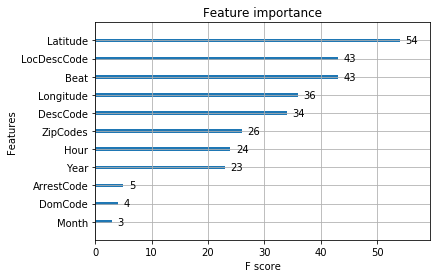

In [62]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [63]:
# Load the crime weather dataset with the new set of features
X = CW_clean[['Beat','Hour','Latitude','Longitude','LocDescCode','Year','ZipCodes','DescCode']]

Y = CW_clean[['PrimaryTypeCode']]
#y = CW_clean.PrimaryType # define the target variable (dependent variable) as y

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [65]:
train_xgb = xgb.DMatrix(X_train, label=Y_train)
test_xgb  = xgb.DMatrix(X_test)

In [66]:
# Instantiate the XGBRegressor: xg_rgr
xg_rgr = xgb.XGBRegressor(objective='reg:linear', n_estimators=10, seed=123)
# Fit the regressor to the training set
xg_rgr.fit(X_train,Y_train.values.ravel())
# Predict the labels of the test set: preds
preds = xg_rgr.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 9.865093


In [67]:
#tuning parameters
params = {
    'max_depth': 5,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'reg:linear',  # error evaluation for multiclass training
    'colsample_bytree': 0.3, # percentage of samples used per tree
    'learning_rate': 0.1,
    'alpha': 10
}

In [68]:
cv_results2 = xgb.cv(dtrain=train_xgb, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [69]:
cv_results2.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,17.672715,0.001964,17.672741,0.004646
1,16.715076,0.026467,16.715049,0.024033
2,15.683191,0.323393,15.683071,0.319842
3,14.969920,0.321267,14.969914,0.318337
4,14.348422,0.306406,14.348495,0.303720


In [70]:
print((cv_results2["test-rmse-mean"]).tail(1))

49    5.195533
Name: test-rmse-mean, dtype: float64


RMSE improved from 5.48 to 5.19

In [ ]:
#using the classification function to predict
# Instantiate the XGBRegressor: xg_rgr
xg_cl = xgb.XGBClassifier(objective='reg:linear', n_estimators=10, seed=123)
# Fit the regressor to the training set
xg_cl.fit(X_train,Y_train.values.ravel())
# Predict the labels of the test set: preds
preds = xg_cl.predict(X_test)
# Compute the accuracy: accuracy
accuracy = accuracy_score(Y_test, preds)
print("Accuracy: %.2f%%" % (accuracy * 100.0))